In [45]:
from keras.models import Model # type: ignore
from keras.layers import Dense # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import Convolution2D, MaxPool2D, Activation, Dropout, Flatten, Dense # type: ignore
from keras.preprocessing.image import  img_to_array, load_img # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [46]:
test = pd.read_csv("mnist_test.csv")

In [47]:
train = pd.read_csv("mnist_train.csv")

# SEPERATING AND NORMALIZATION

In [48]:
y_train = train["label"]
x_train = train.drop(["label"], axis=1)

y_test = test["label"]
x_test = test.drop(["label"], axis=1)

# Normalize the data
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255.0
x_test = x_test / 255.0

print("x_train shape : ", x_train.shape)

x_train shape :  (60000, 784)


# RESHAPE

In [49]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)


# LABEL ENCODING

In [50]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# TRAIN TEST SPLIT

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.20,random_state=42)


# CREATE CNN MODEL

In [65]:
epochs= 100
batch_size = 120
num_classes = 10

model = Sequential()
training = True
model.add(Convolution2D(filters=64,kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Convolution2D(filters=128,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Convolution2D(filters=256,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256, activation="relu"))  
model.add(Dropout(0.5))
model.add(Dense(units=512, activation="relu"))  
model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])




# DATAGENERATOR

In [66]:
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    shear_range = 0.45,
    zca_whitening = False,
    rotation_range = 5,
    width_shift_range = 0.025,
    height_shift_range = 0.025,
    zoom_range = 0.025,
    horizontal_flip = True,
    vertical_flip = True
)
datagen.fit(x_train)

# TRAIN MODEL

In [54]:
his=model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),
                       epochs=epochs,validation_data=(x_val,y_val),
                       steps_per_epoch=1600//batch_size)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.1188 - loss: 2.3007 - val_accuracy: 0.2338 - val_loss: 2.2170
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.2197 - loss: 2.2195 - val_accuracy: 0.3096 - val_loss: 1.9174
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.2971 - loss: 2.0094 - val_accuracy: 0.3001 - val_loss: 1.8926
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.3594 - loss: 1.8151 - val_accuracy: 0.3833 - val_loss: 1.6225
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.3996 - loss: 1.6442 - val_accuracy: 0.5271 - val_loss: 1.2892
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.4418 - loss: 1.5139 - val_accuracy: 0.4874 - val_loss: 1.4045
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.4574 - loss: 1.4397 - val_accuracy: 0.5663 - val_loss: 1.2555
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.5281 - loss: 1.2964 - val_accu

2024-05-09 16:01:37.830237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.8662 - loss: 0.4580 - val_accuracy: 0.8726 - val_loss: 0.3942
Epoch 32/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.8546 - loss: 0.4666 - val_accuracy: 0.8932 - val_loss: 0.3376
Epoch 33/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.8772 - loss: 0.4362 - val_accuracy: 0.8869 - val_loss: 0.3711
Epoch 34/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.8421 - loss: 0.4812 - val_accuracy: 0.8817 - val_loss: 0.3737
Epoch 35/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.8566 - loss: 0.4564 - val_accuracy: 0.8813 - val_loss: 0.3709
Epoch 36/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.8406 - loss: 0.4577 - val_accuracy: 0.9052 - val_loss: 0.3136
Epoch 37/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.8692 - loss: 0.4019 - val_accuracy: 0.9038 - val_loss: 0.3127
Epoch 38/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.8889 - loss: 0.3907 - val_accuracy:

2024-05-09 16:02:49.434693: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.9025 - loss: 0.2955 - val_accuracy: 0.9342 - val_loss: 0.2166
Epoch 63/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.9196 - loss: 0.2495 - val_accuracy: 0.9259 - val_loss: 0.2496
Epoch 64/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.9238 - loss: 0.2593 - val_accuracy: 0.9283 - val_loss: 0.2375
Epoch 65/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.9085 - loss: 0.2976 - val_accuracy: 0.9256 - val_loss: 0.2561
Epoch 66/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9236 - loss: 0.2897 - val_accuracy: 0.9346 - val_loss: 0.2190
Epoch 67/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.9220 - loss: 0.2386 - val_accuracy: 0.9421 - val_loss: 0.1924
Epoch 68/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.9022 - loss: 0.3260 - val_accuracy: 0.9280 - val_loss: 0.2323
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.9028 - loss: 0.3053 - val_accuracy:

2024-05-09 16:04:46.317376: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.9365 - loss: 0.2098 - val_accuracy: 0.9303 - val_loss: 0.2369
Epoch 94/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.9246 - loss: 0.2266 - val_accuracy: 0.9513 - val_loss: 0.1736
Epoch 95/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.9320 - loss: 0.2303 - val_accuracy: 0.9542 - val_loss: 0.1612
Epoch 96/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.9379 - loss: 0.2069 - val_accuracy: 0.9523 - val_loss: 0.1584
Epoch 97/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.9299 - loss: 0.2295 - val_accuracy: 0.9279 - val_loss: 0.2278
Epoch 98/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.9230 - loss: 0.2261 - val_accuracy: 0.9393 - val_loss: 0.1967
Epoch 99/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.9291 - loss: 0.2349 - val_accuracy: 0.9523 - val_loss: 0.1558
Epoch 100/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.9176 - loss: 0.2597 - val_accuracy

# MODEL VISUALIZATION

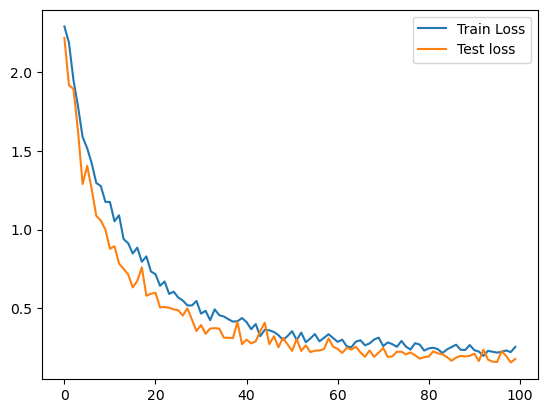

In [55]:
plt.plot(his.history["loss"], label = "Train Loss")
plt.plot(his.history["val_loss"], label = "Test loss")
plt.legend()
plt.show()

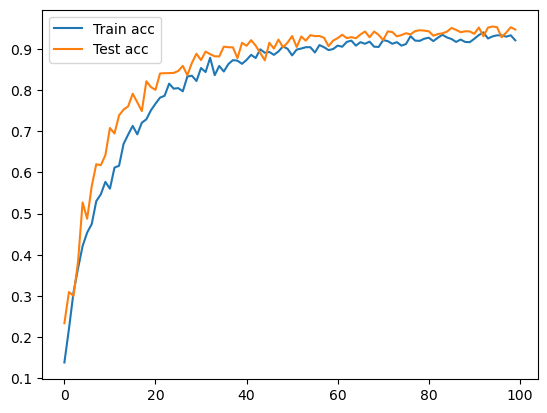

In [56]:
plt.plot(his.history["accuracy"], label = "Train acc")
plt.plot(his.history["val_accuracy"], label = "Test acc")
plt.legend()
plt.show()

In [80]:
import numpy as np

# 28x28 piksellik NumPy dizisi oluştur
image = np.random.randint(0, 256, (28, 28))
 # Yeni bir rakam görüntüsü (28x28 piksellik NumPy dizisi)
image = image.reshape(1, 28, 28)  # Tek bir örnek için şekli yeniden boyutlandırın
print(image)


tahminler = model.predict(image)
print('Tahmin:', np.argmax(tahminler))  # En yüksek olasılıklı sınıfı yazdırın

[[[239  73  12  61 173  36 123 148  82 193 146 182  83  72 163   9  13
   192 184  23  44   5  56 101 233  30 113 245]
  [150 115  32 187  12 231 127 204   5  70 212  17   3   9  38  39 239
   220 166 242  39 147 234 209 186 211  78 204]
  [236 199  76  84  10  63 182  15  85 139 156  50   0  92   1  48  46
   111  96 213 208  41 236  21 211 211 229 157]
  [ 63  40  91  27  67  43 145  23 151  95  31  78 198 162  25  78 191
    10 153 138 187  23  86  68 184 251 115  58]
  [ 43  68 243  57 118 225 184  90  82 140 170 105  13 236 232 124 119
   215  11 136 232 228 199 248 131 115   0 249]
  [ 16 134 163 199 133 128 167 224 147 112 207  14 134 206 174 112 226
    54 188 150 159 136 185 252 130 246  53  55]
  [ 97 139 157 104   0 152 204 152 212  24  29 132 251  80 148 204  85
   223 237 223 224  49 100  52 215 171  83  90]
  [243 175  75 235 182 136 255  73  19 115 183  76 233  78 233 235 157
   217 235 224  73 168 231  40 179 120 249 170]
  [ 84 158 198 151 162 200 103 135 161 253 206 1